In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from white_demura import get_signal_mapping_overlap, RGB_mask_no_roi, sum_contour, extract_middle_roi, RGB_mask, apply_mask, get_signal_mapping, generate_mapping
import skimage.measure



In [262]:
red_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_X_30000_5x5_conv.bmp'
green_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_Y_25000_5x5_conv.bmp'
blue_image_path = '/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_Z_40000_5x5_conv.bmp'


## Get contours.


In [3]:
a, b, red_contours, red_df, red_binary = RGB_mask_no_roi(red_image_path,'/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_contour.png', 8)
a, b, green_contours, green_df, green_binary = RGB_mask_no_roi(green_image_path,'/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_contour.png', 8)
a, b, blue_contours, blue_df, blue_binary = RGB_mask_no_roi(blue_image_path,'/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/blue_contour.png', 8)

Threshold value: 8
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/thresholded/255_255_255_X_30000_5x5_conv.bmp
Threshold value: 8
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/thresholded/255_255_255_Y_25000_5x5_conv.bmp
Threshold value: 8
Saved thresholded image to: /Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/thresholded/255_255_255_Z_40000_5x5_conv.bmp


In [4]:

def check(i, j, n, m):
    return i >= 0 and j >= 0 and i < n and j < m
 
def mark_component(v, vis, i, j, n, m, l):
    if not check(i, j, n, m):
        return
    
    vis[i][j] = True
    if v[i][j] == 255:
        v[i][j] = 0
        #add point to list
        l.append([i, j])

        mark_component(v, vis, i + 1, j, n, m, l)
        mark_component(v, vis, i - 1, j, n, m, l)
        mark_component(v, vis, i, j + 1, n, m, l)
        mark_component(v, vis, i, j - 1, n, m, l)



In [5]:
def run_dfs(binary):
    v = binary.copy()
    n = len(v)
    m = len(v[0])
    cnt = 0
    vis = [[False for j in range(m)] for i in range(n)]
    mapping = {}
    idx = 0
    for i in range(n):
        for j in range(m):
            if not vis[i][j] and v[i][j] == 255:
                cnt += 1
                lst = []
                mark_component(v, vis, i, j, n, m, lst)
                if len(lst) > 2:
                    mapping[idx] = lst
                    idx = idx + 1
    print("The number of islands in the matrix are:")
    print(len(mapping))
    return mapping

## Read all Clear and RGB Images

In [6]:
clear_image_4 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/4_4_4_clear_200000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_8 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/8_8_8_clear_70000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/16_16_16_clear_16000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/32_32_32_clear_4000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_64 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/64_64_64_clear_700000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/128_128_128_clear_180000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
clear_image_255 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_clear_30000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)

In [7]:
red_image_4 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/4_4_4_X_200000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_8 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/8_8_8_X_70000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/16_16_16_X_16000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/32_32_32_X_5000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_64 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/64_64_64_X_850000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/128_128_128_X_180000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
red_image_255 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_X_30000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)

In [8]:
green_image_4 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/4_4_4_Y_200000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_8 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/8_8_8_Y_40000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/16_16_16_Y_12500000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/32_32_32_Y_3000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_64 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/64_64_64_Y_650000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/128_128_128_Y_130000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
green_image_255 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_Y_25000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)

In [9]:
blue_image_4 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/4_4_4_Z_300000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_8 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/8_8_8_Z_110000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_16 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/16_16_16_Z_21000000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_32 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/32_32_32_Z_6500000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_64 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/64_64_64_Z_1100000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_128 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/128_128_128_Z_200000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)
blue_image_255 = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/255_255_255_Z_40000_5x5_conv.bmp', cv2.IMREAD_GRAYSCALE)

## Gennerate mapping.

In [10]:
red_covered_pixels_mapping = run_dfs(red_binary)
green_covered_pixels_mapping = run_dfs(green_binary)
blue_covered_pixels_mapping = run_dfs(blue_binary)

The number of islands in the matrix are:
1510
The number of islands in the matrix are:
1505
The number of islands in the matrix are:
1514


In [11]:
def reconstruct_mask(image, mapping):
    output_image = np.zeros(image.shape)
    for i in range(0, len(mapping)): 
        for dot in mapping[i]:
            output_image[dot[0], dot[1]] = image[dot[0], dot[1]]
    return output_image
   


In [12]:
reconstruct_mask(clear_image_255, red_covered_pixels_mapping).shape

(162, 215)

In [13]:
red_covered_pixels_mapping

{0: [[0, 4], [1, 4], [1, 5], [0, 5], [0, 6], [1, 6]],
 1: [[0, 11], [1, 11], [1, 12], [0, 12], [0, 13], [1, 13]],
 2: [[0, 17], [1, 17], [1, 18], [0, 18], [0, 19], [1, 19]],
 3: [[0, 24], [1, 24], [1, 25], [0, 25], [0, 26], [1, 26]],
 4: [[0, 31], [1, 31], [1, 32], [0, 32], [0, 33], [1, 33]],
 5: [[0, 38], [1, 38], [1, 39], [0, 39], [0, 40]],
 6: [[0, 44], [0, 45], [1, 45], [1, 46], [0, 46], [0, 47]],
 7: [[0, 51], [0, 52], [1, 52], [1, 53], [0, 53]],
 8: [[0, 58], [0, 59], [1, 59], [0, 60]],
 9: [[0, 65], [0, 66], [1, 66], [0, 67]],
 10: [[0, 71], [0, 72], [0, 73], [0, 74]],
 11: [[0, 78], [0, 79], [0, 80]],
 12: [[0, 85], [0, 86], [0, 87]],
 13: [[0, 92], [0, 93], [0, 94]],
 14: [[0, 99], [0, 100], [0, 101]],
 15: [[0, 105], [0, 106], [0, 107]],
 16: [[0, 112], [0, 113], [0, 114]],
 17: [[0, 119], [0, 120], [0, 121]],
 18: [[0, 126], [0, 127], [0, 128]],
 19: [[0, 132], [0, 133], [0, 134], [0, 135]],
 20: [[0, 139], [0, 140], [0, 141]],
 21: [[0, 146], [0, 147], [0, 148]],
 22: [[0, 

## Generate signal mappings.

In [124]:
red_signal_map_4 = get_signal_mapping(clear_image_4, red_covered_pixels_mapping)
red_signal_map_8 = get_signal_mapping(clear_image_8, red_covered_pixels_mapping)
red_signal_map_16 = get_signal_mapping(clear_image_16, red_covered_pixels_mapping)
red_signal_map_32 = get_signal_mapping(clear_image_32, red_covered_pixels_mapping)
red_signal_map_64 = get_signal_mapping(clear_image_64, red_covered_pixels_mapping)
red_signal_map_128 = get_signal_mapping(clear_image_128, red_covered_pixels_mapping)
red_signal_map_255 = get_signal_mapping(clear_image_255, red_covered_pixels_mapping)

In [15]:
green_signal_map_4 = get_signal_mapping(clear_image_4, green_covered_pixels_mapping)
green_signal_map_8 = get_signal_mapping(clear_image_8, green_covered_pixels_mapping)
green_signal_map_16 = get_signal_mapping(clear_image_16, green_covered_pixels_mapping)
green_signal_map_32 = get_signal_mapping(clear_image_32, green_covered_pixels_mapping)
green_signal_map_64 = get_signal_mapping(clear_image_64, green_covered_pixels_mapping)
green_signal_map_128 = get_signal_mapping(clear_image_128, green_covered_pixels_mapping)
green_signal_map_255 = get_signal_mapping(clear_image_255, green_covered_pixels_mapping)

In [16]:
blue_signal_map_4 = get_signal_mapping(clear_image_4, blue_covered_pixels_mapping)
blue_signal_map_8 = get_signal_mapping(clear_image_8, blue_covered_pixels_mapping)
blue_signal_map_16 = get_signal_mapping(clear_image_16, blue_covered_pixels_mapping)
blue_signal_map_32 = get_signal_mapping(clear_image_32, blue_covered_pixels_mapping)
blue_signal_map_64 = get_signal_mapping(clear_image_64, blue_covered_pixels_mapping)
blue_signal_map_128 = get_signal_mapping(clear_image_128, blue_covered_pixels_mapping)
blue_signal_map_255 = get_signal_mapping(clear_image_255, blue_covered_pixels_mapping)

In [17]:
red_signal_map_ground_truth_4 = get_signal_mapping(red_image_4, red_covered_pixels_mapping)
red_signal_map_ground_truth_8 = get_signal_mapping(red_image_8, red_covered_pixels_mapping)
red_signal_map_ground_truth_16 = get_signal_mapping(red_image_16, red_covered_pixels_mapping)
red_signal_map_ground_truth_32 = get_signal_mapping(red_image_32, red_covered_pixels_mapping)
red_signal_map_ground_truth_64 = get_signal_mapping(red_image_64, red_covered_pixels_mapping)
red_signal_map_ground_truth_128 = get_signal_mapping(red_image_128, red_covered_pixels_mapping)
red_signal_map_ground_truth_255 = get_signal_mapping(red_image_255, red_covered_pixels_mapping)

In [18]:
green_signal_map_ground_truth_4 = get_signal_mapping(green_image_4, green_covered_pixels_mapping)
green_signal_map_ground_truth_8 = get_signal_mapping(green_image_8, green_covered_pixels_mapping)
green_signal_map_ground_truth_16 = get_signal_mapping(green_image_16, green_covered_pixels_mapping)
green_signal_map_ground_truth_32 = get_signal_mapping(green_image_32, green_covered_pixels_mapping)
green_signal_map_ground_truth_64 = get_signal_mapping(green_image_64, green_covered_pixels_mapping)
green_signal_map_ground_truth_128 = get_signal_mapping(green_image_128, green_covered_pixels_mapping)
green_signal_map_ground_truth_255 = get_signal_mapping(green_image_255, green_covered_pixels_mapping)

In [19]:
blue_signal_map_ground_truth_4 = get_signal_mapping(blue_image_4, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_8 = get_signal_mapping(blue_image_8, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_16 = get_signal_mapping(blue_image_16, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_32 = get_signal_mapping(blue_image_32, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_64 = get_signal_mapping(blue_image_64, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_128 = get_signal_mapping(blue_image_128, blue_covered_pixels_mapping)
blue_signal_map_ground_truth_255 = get_signal_mapping(blue_image_255, blue_covered_pixels_mapping)

In [20]:
red_df = pd.DataFrame()
green_red_df = pd.DataFrame()
blue_red_df = pd.DataFrame()

In [21]:
red_df["4_ground_truth_mapping"] = red_signal_map_ground_truth_4.values()
red_df["8_ground_truth_mapping"] = red_signal_map_ground_truth_8.values()
red_df["16_ground_truth_mapping"] = red_signal_map_ground_truth_16.values()
red_df["32_ground_truth_mapping"] = red_signal_map_ground_truth_32.values()
red_df["64_ground_truth_mapping"] = red_signal_map_ground_truth_64.values()
red_df["128_ground_truth_mapping"] = red_signal_map_ground_truth_128.values()
red_df["255_ground_truth_mapping"] = red_signal_map_ground_truth_255.values()

red_df["4_mapping"] = red_signal_map_4.values()
red_df["8_mapping"] = red_signal_map_8.values()
red_df["16_mapping"] = red_signal_map_16.values()
red_df["32_mapping"] = red_signal_map_32.values()
red_df["64_mapping"] = red_signal_map_64.values()
red_df["128_mapping"] = red_signal_map_128.values()
red_df["255_mapping"] = red_signal_map_255.values()

red_df["4_diff"] = red_df["4_ground_truth_mapping"] - red_df["4_mapping"]
red_df["8_diff"] = red_df["8_ground_truth_mapping"] - red_df["8_mapping"]
red_df["16_diff"] = red_df["16_ground_truth_mapping"] - red_df["16_mapping"]
red_df["32_diff"] = red_df["32_ground_truth_mapping"] - red_df["32_mapping"]
red_df["64_diff"] = red_df["64_ground_truth_mapping"] - red_df["64_mapping"]
red_df["128_diff"] = red_df["128_ground_truth_mapping"] - red_df["128_mapping"]
red_df["255_diff"] = red_df["255_ground_truth_mapping"] - red_df["255_mapping"]

red_df["4_to_gt_ratio"] = red_df["4_mapping"] / red_df["4_ground_truth_mapping"]
red_df["8_to_gt_ratio"] = red_df["8_mapping"] / red_df["8_ground_truth_mapping"] 
red_df["16_to_gt_ratio"] = red_df["16_mapping"] / red_df["16_ground_truth_mapping"]
red_df["32_to_gt_ratio"] = red_df["32_mapping"] / red_df["32_ground_truth_mapping"]
red_df["64_to_gt_ratio"] = red_df["64_mapping"] / red_df["64_ground_truth_mapping"]
red_df["128_to_gt_ratio"] = red_df["128_mapping"] / red_df["128_ground_truth_mapping"]
red_df["255_to_gt_ratio"] = red_df["255_mapping"] / red_df["255_ground_truth_mapping"]

red_df["4_diff_percentage"] = ((red_df['4_to_gt_ratio'].mean() - 1) * 100)
red_df["8_diff_percentage"] = ((red_df['8_to_gt_ratio'].mean() - 1) * 100)
red_df["16_diff_percentage"] = ((red_df['16_to_gt_ratio'].mean() - 1) * 100)
red_df["32_diff_percentage"] = ((red_df['32_to_gt_ratio'].mean() - 1) * 100)
red_df["64_diff_percentage"] = ((red_df['64_to_gt_ratio'].mean() - 1) * 100)
red_df["128_diff_percentage"] = ((red_df['128_to_gt_ratio'].mean() - 1) * 100)
red_df["255_diff_percentage"] = ((red_df['255_to_gt_ratio'].mean() - 1) * 100)

red_df['4_normalized'] = red_df['4_to_gt_ratio'].mean() * red_df["4_ground_truth_mapping"]
red_df['8_normalized'] = red_df['8_to_gt_ratio'].mean() * red_df["8_ground_truth_mapping"]
red_df['16_normalized'] = red_df['16_to_gt_ratio'].mean() * red_df["16_ground_truth_mapping"]
red_df['32_normalized'] = red_df['32_to_gt_ratio'].mean() * red_df["32_ground_truth_mapping"]
red_df['64_normalized'] = red_df['64_to_gt_ratio'].mean() * red_df["64_ground_truth_mapping"]
red_df['128_normalized'] = red_df['128_to_gt_ratio'].mean() * red_df["128_ground_truth_mapping"]
red_df['255_normalized'] = red_df['255_to_gt_ratio'].mean() * red_df["255_ground_truth_mapping"]


In [22]:
green_df["4_ground_truth_mapping"] = green_signal_map_ground_truth_4.values()
green_df["8_ground_truth_mapping"] = green_signal_map_ground_truth_8.values()
green_df["16_ground_truth_mapping"] = green_signal_map_ground_truth_16.values()
green_df["32_ground_truth_mapping"] = green_signal_map_ground_truth_32.values()
green_df["64_ground_truth_mapping"] = green_signal_map_ground_truth_64.values()
green_df["128_ground_truth_mapping"] = green_signal_map_ground_truth_128.values()
green_df["255_ground_truth_mapping"] = green_signal_map_ground_truth_255.values()

green_df["4_mapping"] = green_signal_map_4.values()
green_df["8_mapping"] = green_signal_map_8.values()
green_df["16_mapping"] = green_signal_map_16.values()
green_df["32_mapping"] = green_signal_map_32.values()
green_df["64_mapping"] = green_signal_map_64.values()
green_df["128_mapping"] = green_signal_map_128.values()
green_df["255_mapping"] = green_signal_map_255.values()

green_df["4_diff"] = green_df["4_ground_truth_mapping"] - green_df["4_mapping"]
green_df["8_diff"] = green_df["8_ground_truth_mapping"] - green_df["8_mapping"]
green_df["16_diff"] = green_df["16_ground_truth_mapping"] - green_df["16_mapping"]
green_df["32_diff"] = green_df["32_ground_truth_mapping"] - green_df["32_mapping"]
green_df["64_diff"] = green_df["64_ground_truth_mapping"] - green_df["64_mapping"]
green_df["128_diff"] = green_df["128_ground_truth_mapping"] - green_df["128_mapping"]
green_df["255_diff"] = green_df["255_ground_truth_mapping"] - green_df["255_mapping"]

green_df["4_to_gt_ratio"] = green_df["4_mapping"] / green_df["4_ground_truth_mapping"]
green_df["8_to_gt_ratio"] = green_df["8_mapping"] / green_df["8_ground_truth_mapping"] 
green_df["16_to_gt_ratio"] = green_df["16_mapping"] / green_df["16_ground_truth_mapping"]
green_df["32_to_gt_ratio"] = green_df["32_mapping"] / green_df["32_ground_truth_mapping"]
green_df["64_to_gt_ratio"] = green_df["64_mapping"] / green_df["64_ground_truth_mapping"]
green_df["128_to_gt_ratio"] = green_df["128_mapping"] / green_df["128_ground_truth_mapping"]
green_df["255_to_gt_ratio"] = green_df["255_mapping"] / green_df["255_ground_truth_mapping"]

green_df["4_diff_percentage"] = ((green_df['4_to_gt_ratio'].mean() - 1) * 100)
green_df["8_diff_percentage"] = ((green_df['8_to_gt_ratio'].mean() - 1) * 100)
green_df["16_diff_percentage"] = ((green_df['16_to_gt_ratio'].mean() - 1) * 100)
green_df["32_diff_percentage"] = ((green_df['32_to_gt_ratio'].mean() - 1) * 100)
green_df["64_diff_percentage"] = ((green_df['64_to_gt_ratio'].mean() - 1) * 100)
green_df["128_diff_percentage"] = ((green_df['128_to_gt_ratio'].mean() - 1) * 100)
green_df["255_diff_percentage"] = ((green_df['255_to_gt_ratio'].mean() - 1) * 100)

green_df['4_normalized'] = green_df['4_to_gt_ratio'].mean() * green_df["4_ground_truth_mapping"]
green_df['8_normalized'] = green_df['8_to_gt_ratio'].mean() * green_df["8_ground_truth_mapping"]
green_df['16_normalized'] = green_df['16_to_gt_ratio'].mean() * green_df["16_ground_truth_mapping"]
green_df['32_normalized'] = green_df['32_to_gt_ratio'].mean() * green_df["32_ground_truth_mapping"]
green_df['64_normalized'] = green_df['64_to_gt_ratio'].mean() * green_df["64_ground_truth_mapping"]
green_df['128_normalized'] = green_df['128_to_gt_ratio'].mean() * green_df["128_ground_truth_mapping"]
green_df['255_normalized'] = green_df['255_to_gt_ratio'].mean() * green_df["255_ground_truth_mapping"]


In [23]:
blue_df["4_ground_truth_mapping"] = blue_signal_map_ground_truth_4.values()
blue_df["8_ground_truth_mapping"] = blue_signal_map_ground_truth_8.values()
blue_df["16_ground_truth_mapping"] = blue_signal_map_ground_truth_16.values()
blue_df["32_ground_truth_mapping"] = blue_signal_map_ground_truth_32.values()
blue_df["64_ground_truth_mapping"] = blue_signal_map_ground_truth_64.values()
blue_df["128_ground_truth_mapping"] = blue_signal_map_ground_truth_128.values()
blue_df["255_ground_truth_mapping"] = blue_signal_map_ground_truth_255.values()

blue_df["4_mapping"] = blue_signal_map_4.values()
blue_df["8_mapping"] = blue_signal_map_8.values()
blue_df["16_mapping"] = blue_signal_map_16.values()
blue_df["32_mapping"] = blue_signal_map_32.values()
blue_df["64_mapping"] = blue_signal_map_64.values()
blue_df["128_mapping"] = blue_signal_map_128.values()
blue_df["255_mapping"] = blue_signal_map_255.values()

blue_df["4_diff"] = blue_df["4_ground_truth_mapping"] - blue_df["4_mapping"]
blue_df["8_diff"] = blue_df["8_ground_truth_mapping"] - blue_df["8_mapping"]
blue_df["16_diff"] = blue_df["16_ground_truth_mapping"] - blue_df["16_mapping"]
blue_df["32_diff"] = blue_df["32_ground_truth_mapping"] - blue_df["32_mapping"]
blue_df["64_diff"] = blue_df["64_ground_truth_mapping"] - blue_df["64_mapping"]
blue_df["128_diff"] = blue_df["128_ground_truth_mapping"] - blue_df["128_mapping"]
blue_df["255_diff"] = blue_df["255_ground_truth_mapping"] - blue_df["255_mapping"]

blue_df["4_to_gt_ratio"] = blue_df["4_mapping"] / blue_df["4_ground_truth_mapping"]
blue_df["8_to_gt_ratio"] = blue_df["8_mapping"] / blue_df["8_ground_truth_mapping"] 
blue_df["16_to_gt_ratio"] = blue_df["16_mapping"] / blue_df["16_ground_truth_mapping"]
blue_df["32_to_gt_ratio"] = blue_df["32_mapping"] / blue_df["32_ground_truth_mapping"]
blue_df["64_to_gt_ratio"] = blue_df["64_mapping"] / blue_df["64_ground_truth_mapping"]
blue_df["128_to_gt_ratio"] = blue_df["128_mapping"] / blue_df["128_ground_truth_mapping"]
blue_df["255_to_gt_ratio"] = blue_df["255_mapping"] / blue_df["255_ground_truth_mapping"]

blue_df["4_diff_percentage"] = ((blue_df['4_to_gt_ratio'].mean() - 1) * 100)
blue_df["8_diff_percentage"] = ((blue_df['8_to_gt_ratio'].mean() - 1) * 100)
blue_df["16_diff_percentage"] = ((blue_df['16_to_gt_ratio'].mean() - 1) * 100)
blue_df["32_diff_percentage"] = ((blue_df['32_to_gt_ratio'].mean() - 1) * 100)
blue_df["64_diff_percentage"] = ((blue_df['64_to_gt_ratio'].mean() - 1) * 100)
blue_df["128_diff_percentage"] = ((blue_df['128_to_gt_ratio'].mean() - 1) * 100)
blue_df["255_diff_percentage"] = ((blue_df['255_to_gt_ratio'].mean() - 1) * 100)

blue_df['4_normalized'] = blue_df['4_to_gt_ratio'].mean() * blue_df["4_ground_truth_mapping"]
blue_df['8_normalized'] = blue_df['8_to_gt_ratio'].mean() * blue_df["8_ground_truth_mapping"]
blue_df['16_normalized'] = blue_df['16_to_gt_ratio'].mean() * blue_df["16_ground_truth_mapping"]
blue_df['32_normalized'] = blue_df['32_to_gt_ratio'].mean() * blue_df["32_ground_truth_mapping"]
blue_df['64_normalized'] = blue_df['64_to_gt_ratio'].mean() * blue_df["64_ground_truth_mapping"]
blue_df['128_normalized'] = blue_df['128_to_gt_ratio'].mean() * blue_df["128_ground_truth_mapping"]
blue_df['255_normalized'] = blue_df['255_to_gt_ratio'].mean() * blue_df["255_ground_truth_mapping"]


## 
(16_Blue) / mean(16_Blue)   = A


(16_ground_truth) / mean(16_ground_truth)   = B 


(A - B) / B 

In [24]:
red_new_df = pd.DataFrame()

red_new_df['4_diff'] = 100 * ((red_df['4_mapping'] / red_df['4_mapping'].mean()) - (red_df['4_ground_truth_mapping'] / red_df['4_ground_truth_mapping'].mean()))/((red_df['4_ground_truth_mapping'] / red_df['4_ground_truth_mapping'].mean()))
red_new_df['8_diff'] = 100 * ((red_df['8_mapping'] / red_df['8_mapping'].mean()) - (red_df['8_ground_truth_mapping'] / red_df['8_ground_truth_mapping'].mean()))/((red_df['8_ground_truth_mapping'] / red_df['8_ground_truth_mapping'].mean()))
red_new_df['16_diff'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - (red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))/((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()))
red_new_df['32_diff'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - (red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))/((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()))
red_new_df['64_diff'] = 100 * ((red_df['64_mapping'] / red_df['64_mapping'].mean()) - (red_df['64_ground_truth_mapping'] / red_df['64_ground_truth_mapping'].mean()))/((red_df['64_ground_truth_mapping'] / red_df['64_ground_truth_mapping'].mean()))
red_new_df['128_diff'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - (red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))/((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()))
red_new_df['255_diff'] = 100 * ((red_df['255_mapping'] / red_df['255_mapping'].mean()) - (red_df['255_ground_truth_mapping'] / red_df['255_ground_truth_mapping'].mean()))/((red_df['255_ground_truth_mapping'] / red_df['255_ground_truth_mapping'].mean()))

red_new_df['A-1_4'] = 100 * ((red_df['4_mapping'] / red_df['4_mapping'].mean()) - 1)
red_new_df['A-1_8'] = 100 * ((red_df['8_mapping'] / red_df['8_mapping'].mean()) - 1)
red_new_df['A-1_16'] = 100 * ((red_df['16_mapping'] / red_df['16_mapping'].mean()) - 1)
red_new_df['A-1_32'] = 100 * ((red_df['32_mapping'] / red_df['32_mapping'].mean()) - 1)
red_new_df['A-1_64'] = 100 * ((red_df['64_mapping'] / red_df['64_mapping'].mean()) - 1)
red_new_df['A-1_128'] = 100 * ((red_df['128_mapping'] / red_df['128_mapping'].mean()) - 1)
red_new_df['A-1_255'] = 100 * ((red_df['255_mapping'] / red_df['255_mapping'].mean()) - 1)

red_new_df['B-1_4'] = 100 * ((red_df['4_ground_truth_mapping'] / red_df['4_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_8'] = 100 * ((red_df['8_ground_truth_mapping'] / red_df['8_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_16'] = 100 * ((red_df['16_ground_truth_mapping'] / red_df['16_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_32'] = 100 * ((red_df['32_ground_truth_mapping'] / red_df['32_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_64'] = 100 * ((red_df['64_ground_truth_mapping'] / red_df['64_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_128'] = 100 * ((red_df['128_ground_truth_mapping'] / red_df['128_ground_truth_mapping'].mean()) - 1)
red_new_df['B-1_255'] = 100 * ((red_df['255_ground_truth_mapping'] / red_df['255_ground_truth_mapping'].mean()) - 1)


In [25]:
green_new_df = pd.DataFrame()

green_new_df['4_diff'] = 100 * ((green_df['4_mapping'] / green_df['4_mapping'].mean()) - (green_df['4_ground_truth_mapping'] / green_df['4_ground_truth_mapping'].mean()))/((green_df['4_ground_truth_mapping'] / green_df['4_ground_truth_mapping'].mean()))
green_new_df['8_diff'] = 100 * ((green_df['8_mapping'] / green_df['8_mapping'].mean()) - (green_df['8_ground_truth_mapping'] / green_df['8_ground_truth_mapping'].mean()))/((green_df['8_ground_truth_mapping'] / green_df['8_ground_truth_mapping'].mean()))
green_new_df['16_diff'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - (green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))/((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()))
green_new_df['32_diff'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - (green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))/((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()))
green_new_df['64_diff'] = 100 * ((green_df['64_mapping'] / green_df['64_mapping'].mean()) - (green_df['64_ground_truth_mapping'] / green_df['64_ground_truth_mapping'].mean()))/((green_df['64_ground_truth_mapping'] / green_df['64_ground_truth_mapping'].mean()))
green_new_df['128_diff'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - (green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))/((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()))
green_new_df['255_diff'] = 100 * ((green_df['255_mapping'] / green_df['255_mapping'].mean()) - (green_df['255_ground_truth_mapping'] / green_df['255_ground_truth_mapping'].mean()))/((green_df['255_ground_truth_mapping'] / green_df['255_ground_truth_mapping'].mean()))

green_new_df['A-1_4'] = 100 * ((green_df['4_mapping'] / green_df['4_mapping'].mean()) - 1)
green_new_df['A-1_8'] = 100 * ((green_df['8_mapping'] / green_df['8_mapping'].mean()) - 1)
green_new_df['A-1_16'] = 100 * ((green_df['16_mapping'] / green_df['16_mapping'].mean()) - 1)
green_new_df['A-1_32'] = 100 * ((green_df['32_mapping'] / green_df['32_mapping'].mean()) - 1)
green_new_df['A-1_64'] = 100 * ((green_df['64_mapping'] / green_df['64_mapping'].mean()) - 1)
green_new_df['A-1_128'] = 100 * ((green_df['128_mapping'] / green_df['128_mapping'].mean()) - 1)
green_new_df['A-1_255'] = 100 * ((green_df['255_mapping'] / green_df['255_mapping'].mean()) - 1)

green_new_df['B-1_4'] = 100 * ((green_df['4_ground_truth_mapping'] / green_df['4_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_8'] = 100 * ((green_df['8_ground_truth_mapping'] / green_df['8_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_16'] = 100 * ((green_df['16_ground_truth_mapping'] / green_df['16_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_32'] = 100 * ((green_df['32_ground_truth_mapping'] / green_df['32_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_64'] = 100 * ((green_df['64_ground_truth_mapping'] / green_df['64_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_128'] = 100 * ((green_df['128_ground_truth_mapping'] / green_df['128_ground_truth_mapping'].mean()) - 1)
green_new_df['B-1_255'] = 100 * ((green_df['255_ground_truth_mapping'] / green_df['255_ground_truth_mapping'].mean()) - 1)


In [26]:
blue_new_df = pd.DataFrame()

blue_new_df['4_diff'] = 100 * ((blue_df['4_mapping'] / blue_df['4_mapping'].mean()) - (blue_df['4_ground_truth_mapping'] / blue_df['4_ground_truth_mapping'].mean()))/((blue_df['4_ground_truth_mapping'] / blue_df['4_ground_truth_mapping'].mean()))
blue_new_df['8_diff'] = 100 * ((blue_df['8_mapping'] / blue_df['8_mapping'].mean()) - (blue_df['8_ground_truth_mapping'] / blue_df['8_ground_truth_mapping'].mean()))/((blue_df['8_ground_truth_mapping'] / blue_df['8_ground_truth_mapping'].mean()))
blue_new_df['16_diff'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - (blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))/((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()))
blue_new_df['32_diff'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - (blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))/((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()))
blue_new_df['64_diff'] = 100 * ((blue_df['64_mapping'] / blue_df['64_mapping'].mean()) - (blue_df['64_ground_truth_mapping'] / blue_df['64_ground_truth_mapping'].mean()))/((blue_df['64_ground_truth_mapping'] / blue_df['64_ground_truth_mapping'].mean()))
blue_new_df['128_diff'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - (blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))/((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()))
blue_new_df['255_diff'] = 100 * ((blue_df['255_mapping'] / blue_df['255_mapping'].mean()) - (blue_df['255_ground_truth_mapping'] / blue_df['255_ground_truth_mapping'].mean()))/((blue_df['255_ground_truth_mapping'] / blue_df['255_ground_truth_mapping'].mean()))

blue_new_df['A-1_4'] = 100 * ((blue_df['4_mapping'] / blue_df['4_mapping'].mean()) - 1)
blue_new_df['A-1_8'] = 100 * ((blue_df['8_mapping'] / blue_df['8_mapping'].mean()) - 1)
blue_new_df['A-1_16'] = 100 * ((blue_df['16_mapping'] / blue_df['16_mapping'].mean()) - 1)
blue_new_df['A-1_32'] = 100 * ((blue_df['32_mapping'] / blue_df['32_mapping'].mean()) - 1)
blue_new_df['A-1_64'] = 100 * ((blue_df['64_mapping'] / blue_df['64_mapping'].mean()) - 1)
blue_new_df['A-1_128'] = 100 * ((blue_df['128_mapping'] / blue_df['128_mapping'].mean()) - 1)
blue_new_df['A-1_255'] = 100 * ((blue_df['255_mapping'] / blue_df['255_mapping'].mean()) - 1)

blue_new_df['B-1_4'] = 100 * ((blue_df['4_ground_truth_mapping'] / blue_df['4_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_8'] = 100 * ((blue_df['8_ground_truth_mapping'] / blue_df['8_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_16'] = 100 * ((blue_df['16_ground_truth_mapping'] / blue_df['16_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_32'] = 100 * ((blue_df['32_ground_truth_mapping'] / blue_df['32_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_64'] = 100 * ((blue_df['64_ground_truth_mapping'] / blue_df['64_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_128'] = 100 * ((blue_df['128_ground_truth_mapping'] / blue_df['128_ground_truth_mapping'].mean()) - 1)
blue_new_df['B-1_255'] = 100 * ((blue_df['255_ground_truth_mapping'] / blue_df['255_ground_truth_mapping'].mean()) - 1)


<AxesSubplot:xlabel='index'>

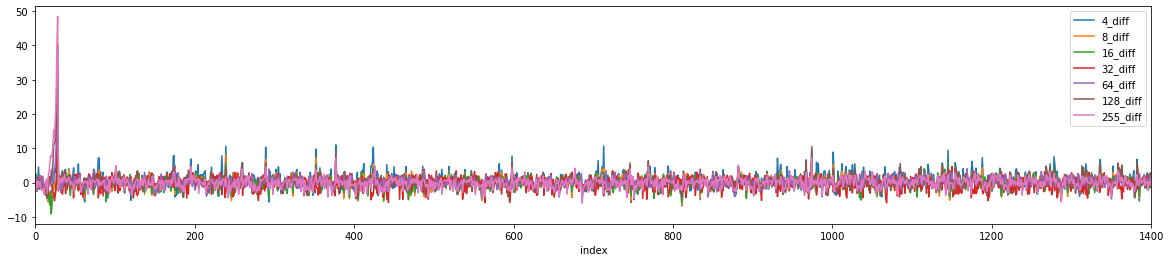

In [27]:
red_new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

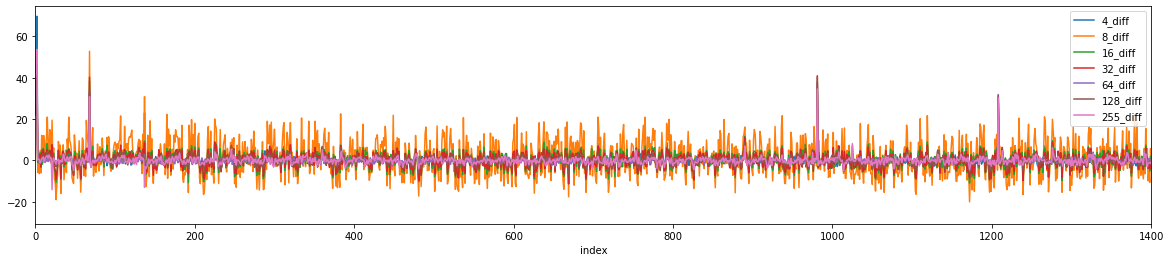

In [28]:
green_new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

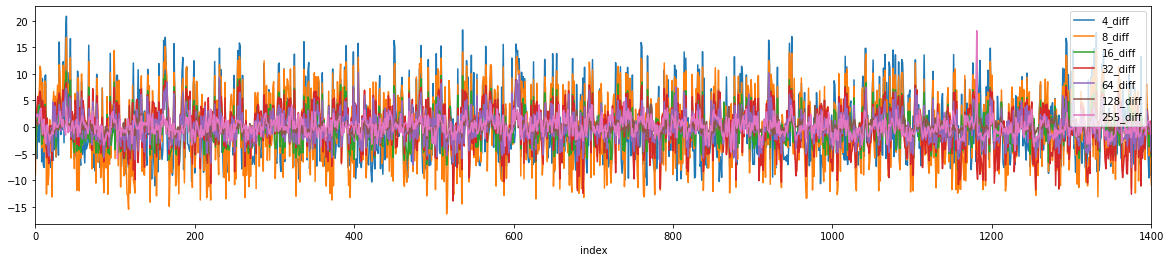

In [29]:
blue_new_df.reset_index().plot(figsize=[20, 4],xlim=[0, 1400], x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [30]:
red_green_overlap = red_binary * green_binary
red_blue_overlap = red_binary * blue_binary
green_blue_overlap = blue_binary * green_binary


In [84]:
green_blue_overlap.max()

65025

In [31]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_green_overlap.png', red_green_overlap)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_blue_overlap.png', red_blue_overlap)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_blue_overlap.png', green_blue_overlap)

True

In [61]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_binary.png', red_binary)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/blue_binary.png', blue_binary)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_binary.png', green_binary)

True

In [62]:
green_binary_tmp = green_binary.copy()

In [63]:
v = green_binary.copy()
n = len(v)
m = len(v[0])
cnt = 0
vis = [[False for j in range(m)] for i in range(n)]
mapping = {}
idx = 0
for i in range(n):
    for j in range(m):
        if not vis[i][j] and v[i][j] == 255:
            cnt += 1
            lst = []
            mark_component(v, vis, i, j, n, m, lst)
            if len(lst) <= 2:
                for dot in lst:
                    green_binary_tmp[dot[0]][dot[1]] = 0
                



In [64]:
v

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [65]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/test.png',green_binary_tmp)

True

In [95]:
red_green_overlap = red_binary * green_binary_tmp
red_blue_overlap = red_binary * blue_binary
green_blue_overlap = blue_binary * green_binary_tmp


In [96]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_green_overlap.png', red_green_overlap)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_blue_overlap.png', red_blue_overlap)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_blue_overlap.png', green_blue_overlap)

True

In [97]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_binary.png', red_binary)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/blue_binary.png', blue_binary)
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_binary.png', green_binary_tmp)

True

## M_rg, M_gb & M_br

In [98]:
mask_red_green_overlap = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_green_overlap.png', cv2.IMREAD_GRAYSCALE)
mask_red_blue_overlap = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/red_blue_overlap.png', cv2.IMREAD_GRAYSCALE)
mask_green_blue_overlap = cv2.imread('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/green_blue_overlap.png', cv2.IMREAD_GRAYSCALE)

In [101]:
red_green_overlap[red_green_overlap > 0] = 1
red_blue_overlap[red_blue_overlap > 0] = 1
green_blue_overlap[green_blue_overlap > 0] = 1

In [70]:
def reconstruct_mask(image, mapping):
    output_image = np.zeros(image.shape)
    for i in range(0, len(mapping)): 
        for dot in mapping[i]:
            output_image[dot[0], dot[1]] = image[dot[0], dot[1]]
    return output_image
   


In [71]:
red_mask = reconstruct_mask(clear_image_255, red_covered_pixels_mapping)
green_mask = reconstruct_mask(clear_image_255, green_covered_pixels_mapping)
blue_mask = reconstruct_mask(clear_image_255, blue_covered_pixels_mapping)

### red_blue_overlap testing

In [72]:
red_blue_overlap[red_blue_overlap > 0] = 1

In [73]:
red_blue_overlap.max()

1

## O_r in rb_overlap

In [102]:
overlap_red = red_image_255 * red_blue_overlap 

In [103]:
overlap_red[overlap_red > 0]

array([10,  9,  9,  9, 12, 12,  9, 11, 11,  9,  9, 12, 12,  9, 10, 13,  9,
        9, 11, 12, 15,  9])

## O_b in rb_overlap

overlap_blue = blue_image_255/blue.mean * red_blue_overlap 

In [259]:
blue_image_255.mean()

25.338214183175424

In [260]:
overlap_blue = blue_image_255 * red_blue_overlap / blue_image_255.mean()

red / red pixel mean()

In [106]:
overlap_red[overlap_red > 0]

array([10,  9,  9,  9, 12, 12,  9, 11, 11,  9,  9, 12, 12,  9, 10, 13,  9,
        9, 11, 12, 15,  9])

In [261]:
overlap_blue[overlap_blue > 0]

array([0.35519472, 0.35519472, 0.35519472, 0.35519472, 0.3946608 ,
       0.35519472, 0.3946608 , 0.35519472, 0.35519472, 0.3946608 ,
       0.55252513, 0.55252513, 0.3946608 , 0.3946608 , 0.43412689,
       0.43412689, 0.35519472, 0.63145729, 0.51305905, 0.35519472,
       0.3946608 , 0.3946608 ])

In [108]:

Red_r_b_percentage = (overlap_red.astype(np.float32) / (overlap_red.astype(np.float32) + overlap_blue.astype(np.float32))) * 100

/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/2836221331.py:1: RuntimeWarning: invalid value encountered in true_divide
  Red_r_b_percentage = (overlap_red.astype(np.float32) / (overlap_red.astype(np.float32) + overlap_blue.astype(np.float32))) * 100


In [216]:

Blue_r_b_percentage = 100 - Red_r_b_percentage
Blue_r_b_percentage[Blue_r_b_percentage == 100] = 0

In [218]:
Blue_r_b_percentage[Blue_r_b_percentage>0]

array([48, 50, 50, 50, 46, 43, 53, 45, 45, 53, 61, 54, 46, 53, 53, 46, 50,
       64, 55, 43, 40, 53], dtype=uint8)

In [121]:
Red_r_b_percentage[np.isnan(Red_r_b_percentage)] = 0
Red_r_b_percentage = Red_r_b_percentage.astype(np.uint8)

In [122]:
Red_r_b_percentage[Red_r_b_percentage > 0]

array([52, 50, 50, 50, 54, 57, 47, 55, 55, 47, 39, 46, 54, 47, 47, 54, 50,
       36, 45, 57, 60, 47], dtype=uint8)

In [143]:
Red_r_b_percentage[Red_r_b_percentage > 0] 

array([52, 50, 50, 50, 54, 57, 47, 55, 55, 47, 39, 46, 54, 47, 47, 54, 50,
       36, 45, 57, 60, 47], dtype=uint8)

In [149]:
red_covered_pixels_mapping

{0: [[0, 4], [1, 4], [1, 5], [0, 5], [0, 6], [1, 6]],
 1: [[0, 11], [1, 11], [1, 12], [0, 12], [0, 13], [1, 13]],
 2: [[0, 17], [1, 17], [1, 18], [0, 18], [0, 19], [1, 19]],
 3: [[0, 24], [1, 24], [1, 25], [0, 25], [0, 26], [1, 26]],
 4: [[0, 31], [1, 31], [1, 32], [0, 32], [0, 33], [1, 33]],
 5: [[0, 38], [1, 38], [1, 39], [0, 39], [0, 40]],
 6: [[0, 44], [0, 45], [1, 45], [1, 46], [0, 46], [0, 47]],
 7: [[0, 51], [0, 52], [1, 52], [1, 53], [0, 53]],
 8: [[0, 58], [0, 59], [1, 59], [0, 60]],
 9: [[0, 65], [0, 66], [1, 66], [0, 67]],
 10: [[0, 71], [0, 72], [0, 73], [0, 74]],
 11: [[0, 78], [0, 79], [0, 80]],
 12: [[0, 85], [0, 86], [0, 87]],
 13: [[0, 92], [0, 93], [0, 94]],
 14: [[0, 99], [0, 100], [0, 101]],
 15: [[0, 105], [0, 106], [0, 107]],
 16: [[0, 112], [0, 113], [0, 114]],
 17: [[0, 119], [0, 120], [0, 121]],
 18: [[0, 126], [0, 127], [0, 128]],
 19: [[0, 132], [0, 133], [0, 134], [0, 135]],
 20: [[0, 139], [0, 140], [0, 141]],
 21: [[0, 146], [0, 147], [0, 148]],
 22: [[0, 

In [152]:
# image -> 

22


In [229]:
def signal_sum_overlap(image, key, array, overlap_map):
    sum = 0
    idx = -1
    for point in array:
        if overlap_map[point[0]][point[1]] > 0:
            sum = sum + int (image[point[0]][point[1]] * overlap_map[point[0]][point[1]] / 100)
            idx = key
        else:
            sum = sum + image[point[0]][point[1]]
    return sum, idx

In [230]:
def get_signal_mapping_overlap(image, mapping, overlap_map):
    new_map = {}
    idx_set = []
    for key in mapping:
        new_map[key], idx = signal_sum_overlap(image, key,mapping[key], overlap_map)
        if idx != -1:
            idx_set.append(idx)
    return new_map, idx_set

In [231]:
red_signal_map_4_overlap, idx_set = get_signal_mapping_overlap(clear_image_4, red_covered_pixels_mapping, Red_r_b_percentage)


/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/2580689117.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = sum + int (image[point[0]][point[1]] * overlap_map[point[0]][point[1]] / 100)


In [ ]:
red_signal_map_4_overlap, idx_set = get_signal_mapping_overlap(clear_image_4, red_covered_pixels_mapping, Red_r_b_percentage)


In [232]:
idx_set

[61,
 313,
 699,
 790,
 858,
 882,
 949,
 950,
 974,
 1040,
 1108,
 1109,
 1110,
 1132,
 1200,
 1268,
 1291,
 1358,
 1359,
 1360,
 1426,
 1449]

In [181]:
signal_sum_overlap(clear_image_4, red_covered_pixels_mapping[1], Red_r_b_percentage)


292

In [159]:
red_covered_pixels_mapping[0]

[[0, 4], [1, 4], [1, 5], [0, 5], [0, 6], [1, 6]]

In [182]:
red_signal_map_4_overlap = get_signal_mapping_overlap(clear_image_4, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_8_overlap = get_signal_mapping_overlap(clear_image_8, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_16_overlap = get_signal_mapping_overlap(clear_image_16, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_32_overlap = get_signal_mapping_overlap(clear_image_32, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_64_overlap = get_signal_mapping_overlap(clear_image_64, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_128_overlap = get_signal_mapping_overlap(clear_image_128, red_covered_pixels_mapping, Red_r_b_percentage)
red_signal_map_255_overlap = get_signal_mapping_overlap(clear_image_255, red_covered_pixels_mapping, Red_r_b_percentage)

/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/1210171058.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = sum + int (image[point[0]][point[1]] * overlap_map[point[0]][point[1]] / 100)


In [192]:
for key in red_signal_map_4_overlap.keys():
    if red_signal_map_4_overlap[key] != red_signal_map_4[key]:
        print(key, red_signal_map_4[key], red_signal_map_4_overlap[key]) 

61 485 444
313 350 322
699 302 275
790 294 271
858 271 246
882 374 341
949 279 254
950 231 207
974 273 248
1040 292 267
1108 464 428
1109 298 268
1110 385 351
1132 285 262
1200 406 373
1268 286 260
1291 275 252
1358 259 235
1359 429 392
1360 286 262
1426 334 302
1449 252 233


<AxesSubplot:xlabel='index'>

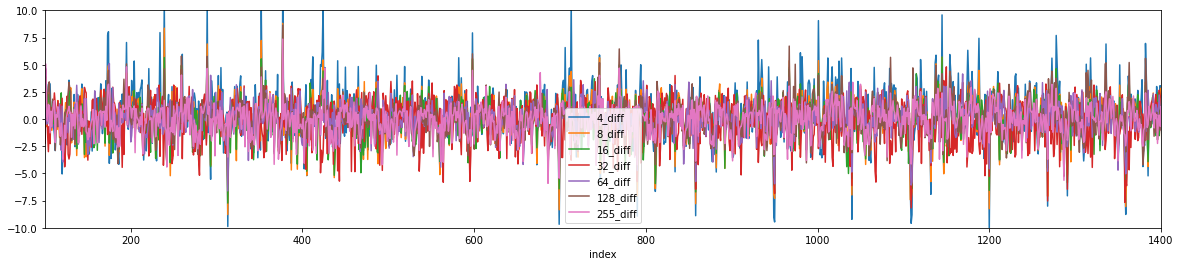

In [189]:
red_overlap_df = pd.DataFrame()

red_overlap_df["4_ground_truth_mapping"] = red_signal_map_ground_truth_4.values()
red_overlap_df["8_ground_truth_mapping"] = red_signal_map_ground_truth_8.values()
red_overlap_df["16_ground_truth_mapping"] = red_signal_map_ground_truth_16.values()
red_overlap_df["32_ground_truth_mapping"] = red_signal_map_ground_truth_32.values()
red_overlap_df["64_ground_truth_mapping"] = red_signal_map_ground_truth_64.values()
red_overlap_df["128_ground_truth_mapping"] = red_signal_map_ground_truth_128.values()
red_overlap_df["255_ground_truth_mapping"] = red_signal_map_ground_truth_255.values()

red_overlap_df["4_mapping"] = red_signal_map_4_overlap.values()
red_overlap_df["8_mapping"] = red_signal_map_8_overlap.values()
red_overlap_df["16_mapping"] = red_signal_map_16_overlap.values()
red_overlap_df["32_mapping"] = red_signal_map_32_overlap.values()
red_overlap_df["64_mapping"] = red_signal_map_64_overlap.values()
red_overlap_df["128_mapping"] = red_signal_map_128_overlap.values()
red_overlap_df["255_mapping"] = red_signal_map_255_overlap.values()

red_overlap_df["4_diff"] = red_overlap_df["4_ground_truth_mapping"] - red_overlap_df["4_mapping"]
red_overlap_df["8_diff"] = red_overlap_df["8_ground_truth_mapping"] - red_overlap_df["8_mapping"]
red_overlap_df["16_diff"] = red_overlap_df["16_ground_truth_mapping"] - red_overlap_df["16_mapping"]
red_overlap_df["32_diff"] = red_overlap_df["32_ground_truth_mapping"] - red_overlap_df["32_mapping"]
red_overlap_df["64_diff"] = red_overlap_df["64_ground_truth_mapping"] - red_overlap_df["64_mapping"]
red_overlap_df["128_diff"] = red_overlap_df["128_ground_truth_mapping"] - red_overlap_df["128_mapping"]
red_overlap_df["255_diff"] = red_overlap_df["255_ground_truth_mapping"] - red_overlap_df["255_mapping"]

red_overlap_df["4_to_gt_ratio"] = red_overlap_df["4_mapping"] / red_overlap_df["4_ground_truth_mapping"]
red_overlap_df["8_to_gt_ratio"] = red_overlap_df["8_mapping"] / red_overlap_df["8_ground_truth_mapping"] 
red_overlap_df["16_to_gt_ratio"] = red_overlap_df["16_mapping"] / red_overlap_df["16_ground_truth_mapping"]
red_overlap_df["32_to_gt_ratio"] = red_overlap_df["32_mapping"] / red_overlap_df["32_ground_truth_mapping"]
red_overlap_df["64_to_gt_ratio"] = red_overlap_df["64_mapping"] / red_overlap_df["64_ground_truth_mapping"]
red_overlap_df["128_to_gt_ratio"] = red_overlap_df["128_mapping"] / red_overlap_df["128_ground_truth_mapping"]
red_overlap_df["255_to_gt_ratio"] = red_overlap_df["255_mapping"] / red_overlap_df["255_ground_truth_mapping"]

red_overlap_df["4_diff_percentage"] = ((red_overlap_df['4_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["8_diff_percentage"] = ((red_overlap_df['8_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["16_diff_percentage"] = ((red_overlap_df['16_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["32_diff_percentage"] = ((red_overlap_df['32_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["64_diff_percentage"] = ((red_overlap_df['64_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["128_diff_percentage"] = ((red_overlap_df['128_to_gt_ratio'].mean() - 1) * 100)
red_overlap_df["255_diff_percentage"] = ((red_overlap_df['255_to_gt_ratio'].mean() - 1) * 100)

red_overlap_df['4_normalized'] = red_overlap_df['4_to_gt_ratio'].mean() * red_overlap_df["4_ground_truth_mapping"]
red_overlap_df['8_normalized'] = red_overlap_df['8_to_gt_ratio'].mean() * red_overlap_df["8_ground_truth_mapping"]
red_overlap_df['16_normalized'] = red_overlap_df['16_to_gt_ratio'].mean() * red_overlap_df["16_ground_truth_mapping"]
red_overlap_df['32_normalized'] = red_overlap_df['32_to_gt_ratio'].mean() * red_overlap_df["32_ground_truth_mapping"]
red_overlap_df['64_normalized'] = red_overlap_df['64_to_gt_ratio'].mean() * red_overlap_df["64_ground_truth_mapping"]
red_overlap_df['128_normalized'] = red_overlap_df['128_to_gt_ratio'].mean() * red_overlap_df["128_ground_truth_mapping"]
red_overlap_df['255_normalized'] = red_overlap_df['255_to_gt_ratio'].mean() * red_overlap_df["255_ground_truth_mapping"]

red_new_overlap_df = pd.DataFrame()

red_new_overlap_df['4_diff'] = 100 * ((red_overlap_df['4_mapping'] / red_overlap_df['4_mapping'].mean()) - (red_overlap_df['4_ground_truth_mapping'] / red_overlap_df['4_ground_truth_mapping'].mean()))/((red_overlap_df['4_ground_truth_mapping'] / red_overlap_df['4_ground_truth_mapping'].mean()))
red_new_overlap_df['8_diff'] = 100 * ((red_overlap_df['8_mapping'] / red_overlap_df['8_mapping'].mean()) - (red_overlap_df['8_ground_truth_mapping'] / red_overlap_df['8_ground_truth_mapping'].mean()))/((red_overlap_df['8_ground_truth_mapping'] / red_overlap_df['8_ground_truth_mapping'].mean()))
red_new_overlap_df['16_diff'] = 100 * ((red_overlap_df['16_mapping'] / red_overlap_df['16_mapping'].mean()) - (red_overlap_df['16_ground_truth_mapping'] / red_overlap_df['16_ground_truth_mapping'].mean()))/((red_overlap_df['16_ground_truth_mapping'] / red_overlap_df['16_ground_truth_mapping'].mean()))
red_new_overlap_df['32_diff'] = 100 * ((red_overlap_df['32_mapping'] / red_overlap_df['32_mapping'].mean()) - (red_overlap_df['32_ground_truth_mapping'] / red_overlap_df['32_ground_truth_mapping'].mean()))/((red_overlap_df['32_ground_truth_mapping'] / red_overlap_df['32_ground_truth_mapping'].mean()))
red_new_overlap_df['64_diff'] = 100 * ((red_overlap_df['64_mapping'] / red_overlap_df['64_mapping'].mean()) - (red_overlap_df['64_ground_truth_mapping'] / red_overlap_df['64_ground_truth_mapping'].mean()))/((red_overlap_df['64_ground_truth_mapping'] / red_overlap_df['64_ground_truth_mapping'].mean()))
red_new_overlap_df['128_diff'] = 100 * ((red_overlap_df['128_mapping'] / red_overlap_df['128_mapping'].mean()) - (red_overlap_df['128_ground_truth_mapping'] / red_overlap_df['128_ground_truth_mapping'].mean()))/((red_overlap_df['128_ground_truth_mapping'] / red_overlap_df['128_ground_truth_mapping'].mean()))
red_new_overlap_df['255_diff'] = 100 * ((red_overlap_df['255_mapping'] / red_overlap_df['255_mapping'].mean()) - (red_overlap_df['255_ground_truth_mapping'] / red_overlap_df['255_ground_truth_mapping'].mean()))/((red_overlap_df['255_ground_truth_mapping'] / red_overlap_df['255_ground_truth_mapping'].mean()))

red_new_overlap_df['A-1_4'] = 100 * ((red_overlap_df['4_mapping'] / red_overlap_df['4_mapping'].mean()) - 1)
red_new_overlap_df['A-1_8'] = 100 * ((red_overlap_df['8_mapping'] / red_overlap_df['8_mapping'].mean()) - 1)
red_new_overlap_df['A-1_16'] = 100 * ((red_overlap_df['16_mapping'] / red_overlap_df['16_mapping'].mean()) - 1)
red_new_overlap_df['A-1_32'] = 100 * ((red_overlap_df['32_mapping'] / red_overlap_df['32_mapping'].mean()) - 1)
red_new_overlap_df['A-1_64'] = 100 * ((red_overlap_df['64_mapping'] / red_overlap_df['64_mapping'].mean()) - 1)
red_new_overlap_df['A-1_128'] = 100 * ((red_overlap_df['128_mapping'] / red_overlap_df['128_mapping'].mean()) - 1)
red_new_overlap_df['A-1_255'] = 100 * ((red_overlap_df['255_mapping'] / red_overlap_df['255_mapping'].mean()) - 1)

red_new_overlap_df['B-1_4'] = 100 * ((red_overlap_df['4_ground_truth_mapping'] / red_overlap_df['4_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_8'] = 100 * ((red_overlap_df['8_ground_truth_mapping'] / red_overlap_df['8_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_16'] = 100 * ((red_overlap_df['16_ground_truth_mapping'] / red_overlap_df['16_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_32'] = 100 * ((red_overlap_df['32_ground_truth_mapping'] / red_overlap_df['32_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_64'] = 100 * ((red_overlap_df['64_ground_truth_mapping'] / red_overlap_df['64_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_128'] = 100 * ((red_overlap_df['128_ground_truth_mapping'] / red_overlap_df['128_ground_truth_mapping'].mean()) - 1)
red_new_overlap_df['B-1_255'] = 100 * ((red_overlap_df['255_ground_truth_mapping'] / red_overlap_df['255_ground_truth_mapping'].mean()) - 1)

red_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

In [234]:
red_new_overlap_df

,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,A-1_16,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
0,0.893508,0.809939,1.700654,0.899297,0.817194,0.235163,0.047477,5.649541,8.202196,6.131459,...,4.793806,4.038922,5.966090,4.713914,7.332865,4.356712,3.893865,3.944379,3.794835,5.915803
1,1.662105,0.229496,2.542810,1.863674,1.787372,0.706208,0.939819,-7.911445,-2.909032,-0.001766,...,2.370828,1.998943,3.729338,-9.417030,-3.131342,-2.481477,-1.500173,0.573210,1.283669,2.763547
2,0.886663,0.733181,-0.566454,-1.177032,-2.515199,-1.441204,-1.417009,-19.580201,-12.962048,-7.468301,...,-2.778001,-1.826017,-2.421728,-20.286986,-13.595549,-6.941166,-1.500173,-0.269582,-0.390441,-1.019160
3,0.516553,0.665237,1.355764,0.322399,0.023995,0.706208,0.541001,12.903091,7.143983,4.264825,...,1.159339,1.998943,2.051775,12.322883,6.435933,2.870149,2.252201,1.135072,1.283669,1.502645
4,4.658800,1.945019,1.291163,-0.499285,0.222472,1.659523,0.288989,-6.334586,-5.819116,-4.535019,...,-3.989490,0.978953,4.008932,-10.504025,-7.616002,-5.751915,-2.672790,-4.202612,-0.669459,3.709224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,-6.079936,-4.272646,-3.990099,0.255184,1.243169,-0.523596,-0.108859,72.192982,43.387751,25.597782,...,12.062741,3.528927,-2.701321,83.339932,49.787647,30.817531,13.274801,10.686718,4.073853,-2.595288
1506,0.896504,0.154467,0.980526,-2.749812,-1.730440,-1.339387,-0.466048,-26.518379,-18.253109,-14.134850,...,-6.412468,-3.101004,-2.421728,-27.171292,-18.379186,-14.968605,-4.783501,-4.764474,-1.785533,-1.964837
1507,-1.815228,-0.979968,-0.665052,1.356890,-0.121254,-0.695380,0.352067,16.687552,11.905938,9.864726,...,2.976573,-0.806028,-1.303352,18.844857,13.013434,10.600276,3.424818,3.101587,-0.111423,-1.649611
1508,2.562437,0.516975,-0.612922,-2.998289,-1.809702,0.173191,-0.730470,-41.656224,-31.480761,-23.468018,...,-10.349807,-6.925965,-5.497261,-43.113895,-31.833167,-22.996044,-9.943015,-8.697505,-7.086882,-4.801867


In [237]:
idx_set

[61,
 313,
 699,
 790,
 858,
 882,
 949,
 950,
 974,
 1040,
 1108,
 1109,
 1110,
 1132,
 1200,
 1268,
 1291,
 1358,
 1359,
 1360,
 1426,
 1449]

In [239]:
red_new_overlap_df.reset_index().iloc[idx_set]

,index,4_diff,8_diff,16_diff,32_diff,64_diff,128_diff,255_diff,A-1_4,A-1_8,...,A-1_64,A-1_128,A-1_255,B-1_4,B-1_8,B-1_16,B-1_32,B-1_64,B-1_128,B-1_255
61,61,-12.368421,-11.119867,-8.121642,-4.449097,-5.058309,-4.822201,-4.799150,40.025063,19.313424,...,0.553594,-3.865996,-9.970763,59.788360,34.240825,21.898154,7.880763,5.910895,1.004651,-5.432318
313,313,-9.881960,-8.779897,-7.724473,-5.979081,-6.606199,-2.964385,-3.486242,1.549708,-2.909032,...,-9.744063,-7.945954,-10.250357,12.685215,6.435933,3.167462,0.610537,-3.359820,-5.133753,-7.008446
699,699,-9.676018,-8.344367,-6.420893,-4.217739,-4.802610,-5.493518,-5.429619,-13.272765,-8.200093,...,-3.989490,-7.180962,-9.970763,-3.982051,0.157409,2.870149,0.845061,0.854141,-1.785533,-4.801867
790,790,-8.927809,-7.061889,-5.437838,-5.745491,-4.725787,-3.717773,-4.196469,-14.534252,-11.639283,...,-7.926829,-4.630988,-5.776854,-6.156043,-4.925206,-6.941166,-3.610884,-3.359820,-0.948478,-1.649611
858,858,-8.886338,-7.779216,-6.699376,-6.445234,-5.741280,-3.988229,-3.864499,-22.418546,-15.078472,...,-5.200979,-4.630988,-6.056448,-14.852008,-7.914980,-3.968040,0.845061,0.573210,-0.669459,-2.280062
882,882,-4.870319,-4.483621,-3.143843,-2.089244,-2.765103,-0.253378,-0.479583,7.541771,4.233900,...,0.250722,-2.591010,-7.454418,13.047547,9.126729,7.924463,5.535529,3.101587,-2.343570,-7.008446
949,949,-9.020468,-6.887296,-6.038232,-5.599214,-4.098983,-3.431162,-3.266337,-19.895572,-14.813919,...,-7.321085,-4.885986,-5.776854,-11.953353,-8.512934,-6.346540,-2.438267,-3.359820,-1.506514,-2.595288
950,950,-9.461452,-7.284905,-5.158062,-6.845832,-5.945916,-2.498679,-3.213978,-34.718045,-24.602382,...,-10.955552,-6.415970,-6.336042,-27.895956,-18.678164,-11.995479,-4.079931,-5.326335,-4.017680,-3.225739
974,974,-0.065789,-1.508532,-0.410240,-2.919877,-0.307951,5.043790,1.625079,-21.787803,-16.665791,...,-7.018212,-3.865996,-5.497261,-21.736314,-15.389413,-11.103542,-3.845407,-6.730989,-8.481974,-7.008446
1040,1040,-9.220549,-6.976271,-5.468767,-6.110871,-4.873270,-3.094149,-2.802299,-15.795739,-13.226601,...,-9.138318,-5.905975,-4.099291,-7.243038,-6.719070,-6.346540,-2.438267,-4.483543,-2.901606,-1.334385


<AxesSubplot:xlabel='index'>

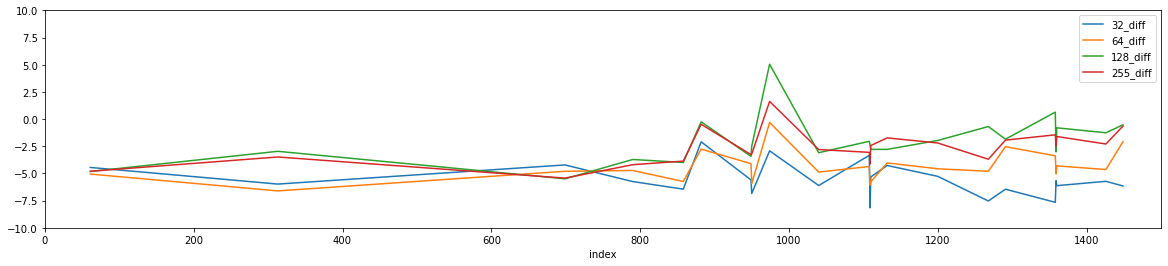

In [247]:
red_new_overlap_df.reset_index().iloc[idx_set].plot(figsize=[20, 4],xlim=[0, 1500], ylim = [-10, 10],x='index', y=[ '32_diff', '64_diff', '128_diff', '255_diff'], kind='line')

<AxesSubplot:xlabel='index'>

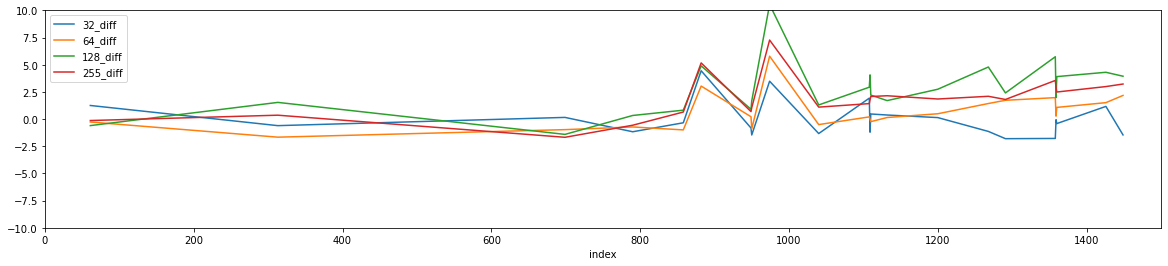

In [245]:
red_new_df.reset_index().iloc[idx_set].plot(figsize=[20, 4],xlim=[0, 1500], ylim = [-10, 10],x='index', y=['32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

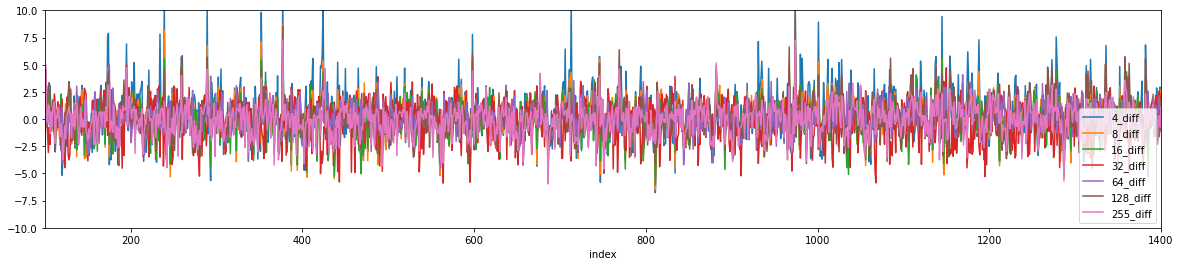

In [190]:
red_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

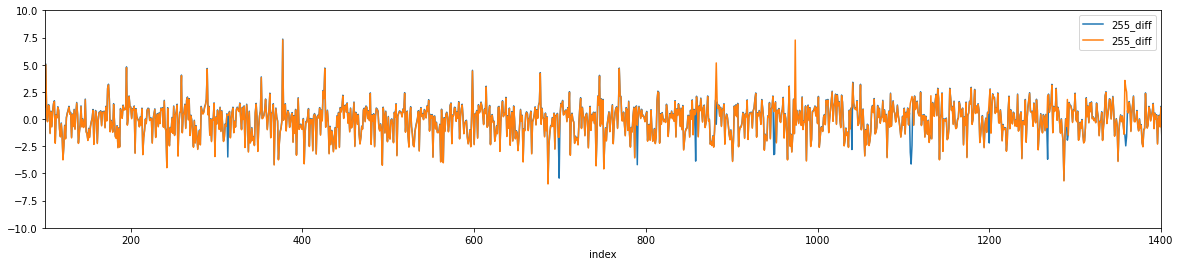

In [196]:
ax = red_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['255_diff'])
red_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['255_diff'], kind = 'line', ax=ax)

<AxesSubplot:xlabel='index'>

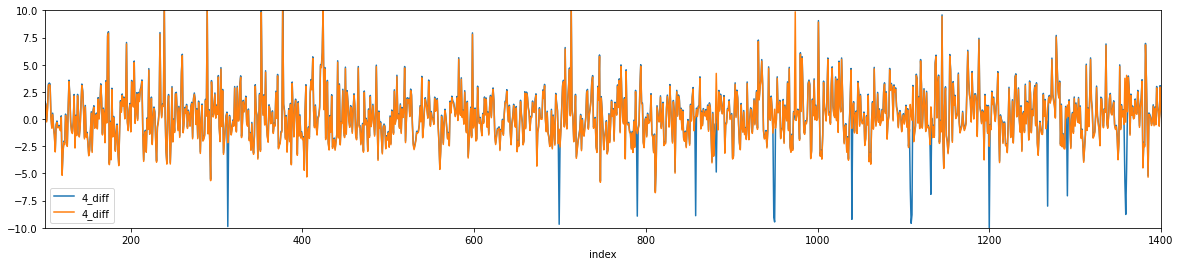

In [200]:
ax = red_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['4_diff'])
red_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['4_diff'], kind = 'line', ax=ax)

In [198]:
diff_df = pd.DataFrame()
diff_df['255'] = red_new_overlap_df['255_diff'] - red_new_df['255_diff']
diff_df['128'] = red_new_overlap_df['128_diff'] - red_new_df['128_diff']
diff_df['64'] = red_new_overlap_df['64_diff'] - red_new_df['64_diff']
diff_df['32'] = red_new_overlap_df['32_diff'] - red_new_df['32_diff']
diff_df['16'] = red_new_overlap_df['16_diff'] - red_new_df['16_diff']
diff_df['8'] = red_new_overlap_df['8_diff'] - red_new_df['8_diff']
diff_df['4'] = red_new_overlap_df['4_diff'] - red_new_df['4_diff']

In [ ]:
over

In [210]:
red_new_overlap_df['255_diff']

0       0.047477
1       0.939819
2      -1.417009
3       0.541001
4       0.288989
          ...   
1505   -0.108859
1506   -0.466048
1507    0.352067
1508   -0.730470
1509   -3.667438
Name: 255_diff, Length: 1510, dtype: float64

<AxesSubplot:xlabel='index'>

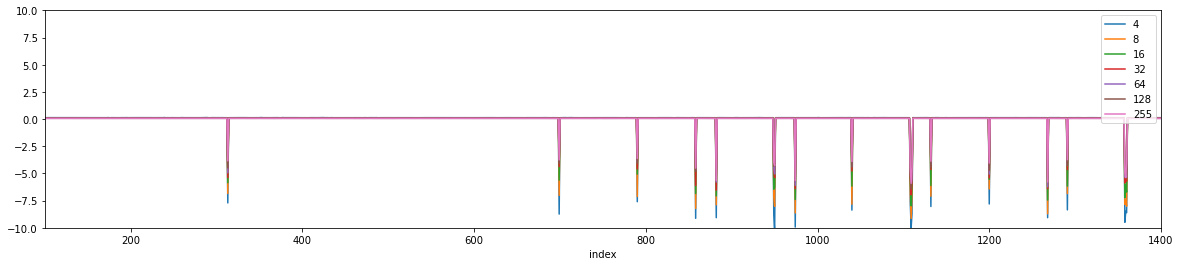

In [211]:
diff_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['4', '8', '16', '32', '64', '128', '255'])

In [209]:
diff_df[diff_df['4'] > 1]

,255,128,64,32,16,8,4


In [184]:
for key in red_signal_map_4_overlap.keys():
    if red_signal_map_4_overlap[key] < red_signal_map_4[key]:
        print(red_signal_map_4[key], red_signal_map_4_overlap[key])



485 444
350 322
302 275
294 271
271 246
374 341
279 254
231 207
273 248
292 267
464 428
298 268
385 351
285 262
406 373
286 260
275 252
259 235
429 392
286 262
334 302
252 233


<AxesSubplot:xlabel='index'>

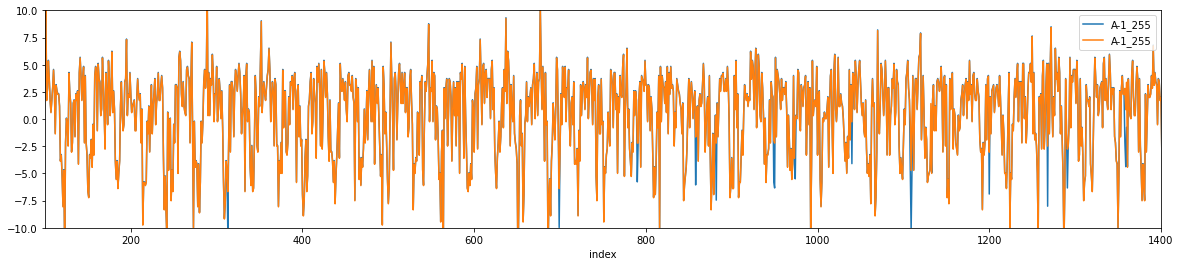

In [213]:
ax = red_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['A-1_255'])
red_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-10, 10],x='index', y=['A-1_255'], kind = 'line', ax=ax)
 

In [250]:
blue_signal_map_4_overlap,idx_set_blue = get_signal_mapping_overlap(clear_image_4, blue_covered_pixels_mapping, Blue_r_b_percentage)


/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/2580689117.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = sum + int (image[point[0]][point[1]] * overlap_map[point[0]][point[1]] / 100)


In [219]:
blue_signal_map_4_overlap = get_signal_mapping_overlap(clear_image_4, blue_covered_pixels_mapping, Blue_r_b_percentage)

blue_signal_map_4_overlap = get_signal_mapping_overlap(clear_image_4, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_8_overlap = get_signal_mapping_overlap(clear_image_8, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_16_overlap = get_signal_mapping_overlap(clear_image_16, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_32_overlap = get_signal_mapping_overlap(clear_image_32, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_64_overlap = get_signal_mapping_overlap(clear_image_64, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_128_overlap = get_signal_mapping_overlap(clear_image_128, blue_covered_pixels_mapping, Blue_r_b_percentage)
blue_signal_map_255_overlap = get_signal_mapping_overlap(clear_image_255, blue_covered_pixels_mapping, Blue_r_b_percentage)

/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/1210171058.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  sum = sum + int (image[point[0]][point[1]] * overlap_map[point[0]][point[1]] / 100)


<AxesSubplot:xlabel='index'>

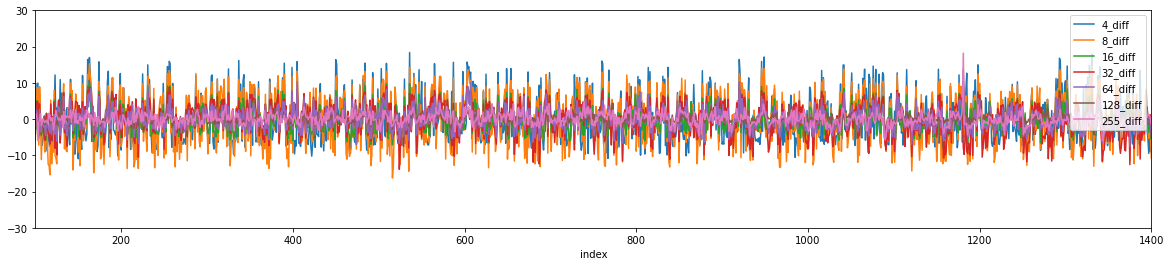

In [221]:
blue_overlap_df = pd.DataFrame()

blue_overlap_df["4_ground_truth_mapping"] = blue_signal_map_ground_truth_4.values()
blue_overlap_df["8_ground_truth_mapping"] = blue_signal_map_ground_truth_8.values()
blue_overlap_df["16_ground_truth_mapping"] = blue_signal_map_ground_truth_16.values()
blue_overlap_df["32_ground_truth_mapping"] = blue_signal_map_ground_truth_32.values()
blue_overlap_df["64_ground_truth_mapping"] = blue_signal_map_ground_truth_64.values()
blue_overlap_df["128_ground_truth_mapping"] = blue_signal_map_ground_truth_128.values()
blue_overlap_df["255_ground_truth_mapping"] = blue_signal_map_ground_truth_255.values()

blue_overlap_df["4_mapping"] = blue_signal_map_4_overlap.values()
blue_overlap_df["8_mapping"] = blue_signal_map_8_overlap.values()
blue_overlap_df["16_mapping"] = blue_signal_map_16_overlap.values()
blue_overlap_df["32_mapping"] = blue_signal_map_32_overlap.values()
blue_overlap_df["64_mapping"] = blue_signal_map_64_overlap.values()
blue_overlap_df["128_mapping"] = blue_signal_map_128_overlap.values()
blue_overlap_df["255_mapping"] = blue_signal_map_255_overlap.values()

blue_overlap_df["4_diff"] = blue_overlap_df["4_ground_truth_mapping"] - blue_overlap_df["4_mapping"]
blue_overlap_df["8_diff"] = blue_overlap_df["8_ground_truth_mapping"] - blue_overlap_df["8_mapping"]
blue_overlap_df["16_diff"] = blue_overlap_df["16_ground_truth_mapping"] - blue_overlap_df["16_mapping"]
blue_overlap_df["32_diff"] = blue_overlap_df["32_ground_truth_mapping"] - blue_overlap_df["32_mapping"]
blue_overlap_df["64_diff"] = blue_overlap_df["64_ground_truth_mapping"] - blue_overlap_df["64_mapping"]
blue_overlap_df["128_diff"] = blue_overlap_df["128_ground_truth_mapping"] - blue_overlap_df["128_mapping"]
blue_overlap_df["255_diff"] = blue_overlap_df["255_ground_truth_mapping"] - blue_overlap_df["255_mapping"]

blue_overlap_df["4_to_gt_ratio"] = blue_overlap_df["4_mapping"] / blue_overlap_df["4_ground_truth_mapping"]
blue_overlap_df["8_to_gt_ratio"] = blue_overlap_df["8_mapping"] / blue_overlap_df["8_ground_truth_mapping"] 
blue_overlap_df["16_to_gt_ratio"] = blue_overlap_df["16_mapping"] / blue_overlap_df["16_ground_truth_mapping"]
blue_overlap_df["32_to_gt_ratio"] = blue_overlap_df["32_mapping"] / blue_overlap_df["32_ground_truth_mapping"]
blue_overlap_df["64_to_gt_ratio"] = blue_overlap_df["64_mapping"] / blue_overlap_df["64_ground_truth_mapping"]
blue_overlap_df["128_to_gt_ratio"] = blue_overlap_df["128_mapping"] / blue_overlap_df["128_ground_truth_mapping"]
blue_overlap_df["255_to_gt_ratio"] = blue_overlap_df["255_mapping"] / blue_overlap_df["255_ground_truth_mapping"]

blue_overlap_df["4_diff_percentage"] = ((blue_overlap_df['4_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["8_diff_percentage"] = ((blue_overlap_df['8_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["16_diff_percentage"] = ((blue_overlap_df['16_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["32_diff_percentage"] = ((blue_overlap_df['32_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["64_diff_percentage"] = ((blue_overlap_df['64_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["128_diff_percentage"] = ((blue_overlap_df['128_to_gt_ratio'].mean() - 1) * 100)
blue_overlap_df["255_diff_percentage"] = ((blue_overlap_df['255_to_gt_ratio'].mean() - 1) * 100)

blue_overlap_df['4_normalized'] = blue_overlap_df['4_to_gt_ratio'].mean() * blue_overlap_df["4_ground_truth_mapping"]
blue_overlap_df['8_normalized'] = blue_overlap_df['8_to_gt_ratio'].mean() * blue_overlap_df["8_ground_truth_mapping"]
blue_overlap_df['16_normalized'] = blue_overlap_df['16_to_gt_ratio'].mean() * blue_overlap_df["16_ground_truth_mapping"]
blue_overlap_df['32_normalized'] = blue_overlap_df['32_to_gt_ratio'].mean() * blue_overlap_df["32_ground_truth_mapping"]
blue_overlap_df['64_normalized'] = blue_overlap_df['64_to_gt_ratio'].mean() * blue_overlap_df["64_ground_truth_mapping"]
blue_overlap_df['128_normalized'] = blue_overlap_df['128_to_gt_ratio'].mean() * blue_overlap_df["128_ground_truth_mapping"]
blue_overlap_df['255_normalized'] = blue_overlap_df['255_to_gt_ratio'].mean() * blue_overlap_df["255_ground_truth_mapping"]

blue_new_overlap_df = pd.DataFrame()

blue_new_overlap_df['4_diff'] = 100 * ((blue_overlap_df['4_mapping'] / blue_overlap_df['4_mapping'].mean()) - (blue_overlap_df['4_ground_truth_mapping'] / blue_overlap_df['4_ground_truth_mapping'].mean()))/((blue_overlap_df['4_ground_truth_mapping'] / blue_overlap_df['4_ground_truth_mapping'].mean()))
blue_new_overlap_df['8_diff'] = 100 * ((blue_overlap_df['8_mapping'] / blue_overlap_df['8_mapping'].mean()) - (blue_overlap_df['8_ground_truth_mapping'] / blue_overlap_df['8_ground_truth_mapping'].mean()))/((blue_overlap_df['8_ground_truth_mapping'] / blue_overlap_df['8_ground_truth_mapping'].mean()))
blue_new_overlap_df['16_diff'] = 100 * ((blue_overlap_df['16_mapping'] / blue_overlap_df['16_mapping'].mean()) - (blue_overlap_df['16_ground_truth_mapping'] / blue_overlap_df['16_ground_truth_mapping'].mean()))/((blue_overlap_df['16_ground_truth_mapping'] / blue_overlap_df['16_ground_truth_mapping'].mean()))
blue_new_overlap_df['32_diff'] = 100 * ((blue_overlap_df['32_mapping'] / blue_overlap_df['32_mapping'].mean()) - (blue_overlap_df['32_ground_truth_mapping'] / blue_overlap_df['32_ground_truth_mapping'].mean()))/((blue_overlap_df['32_ground_truth_mapping'] / blue_overlap_df['32_ground_truth_mapping'].mean()))
blue_new_overlap_df['64_diff'] = 100 * ((blue_overlap_df['64_mapping'] / blue_overlap_df['64_mapping'].mean()) - (blue_overlap_df['64_ground_truth_mapping'] / blue_overlap_df['64_ground_truth_mapping'].mean()))/((blue_overlap_df['64_ground_truth_mapping'] / blue_overlap_df['64_ground_truth_mapping'].mean()))
blue_new_overlap_df['128_diff'] = 100 * ((blue_overlap_df['128_mapping'] / blue_overlap_df['128_mapping'].mean()) - (blue_overlap_df['128_ground_truth_mapping'] / blue_overlap_df['128_ground_truth_mapping'].mean()))/((blue_overlap_df['128_ground_truth_mapping'] / blue_overlap_df['128_ground_truth_mapping'].mean()))
blue_new_overlap_df['255_diff'] = 100 * ((blue_overlap_df['255_mapping'] / blue_overlap_df['255_mapping'].mean()) - (blue_overlap_df['255_ground_truth_mapping'] / blue_overlap_df['255_ground_truth_mapping'].mean()))/((blue_overlap_df['255_ground_truth_mapping'] / blue_overlap_df['255_ground_truth_mapping'].mean()))

blue_new_overlap_df['A-1_4'] = 100 * ((blue_overlap_df['4_mapping'] / blue_overlap_df['4_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_8'] = 100 * ((blue_overlap_df['8_mapping'] / blue_overlap_df['8_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_16'] = 100 * ((blue_overlap_df['16_mapping'] / blue_overlap_df['16_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_32'] = 100 * ((blue_overlap_df['32_mapping'] / blue_overlap_df['32_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_64'] = 100 * ((blue_overlap_df['64_mapping'] / blue_overlap_df['64_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_128'] = 100 * ((blue_overlap_df['128_mapping'] / blue_overlap_df['128_mapping'].mean()) - 1)
blue_new_overlap_df['A-1_255'] = 100 * ((blue_overlap_df['255_mapping'] / blue_overlap_df['255_mapping'].mean()) - 1)

blue_new_overlap_df['B-1_4'] = 100 * ((blue_overlap_df['4_ground_truth_mapping'] / blue_overlap_df['4_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_8'] = 100 * ((blue_overlap_df['8_ground_truth_mapping'] / blue_overlap_df['8_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_16'] = 100 * ((blue_overlap_df['16_ground_truth_mapping'] / blue_overlap_df['16_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_32'] = 100 * ((blue_overlap_df['32_ground_truth_mapping'] / blue_overlap_df['32_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_64'] = 100 * ((blue_overlap_df['64_ground_truth_mapping'] / blue_overlap_df['64_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_128'] = 100 * ((blue_overlap_df['128_ground_truth_mapping'] / blue_overlap_df['128_ground_truth_mapping'].mean()) - 1)
blue_new_overlap_df['B-1_255'] = 100 * ((blue_overlap_df['255_ground_truth_mapping'] / blue_overlap_df['255_ground_truth_mapping'].mean()) - 1)

blue_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

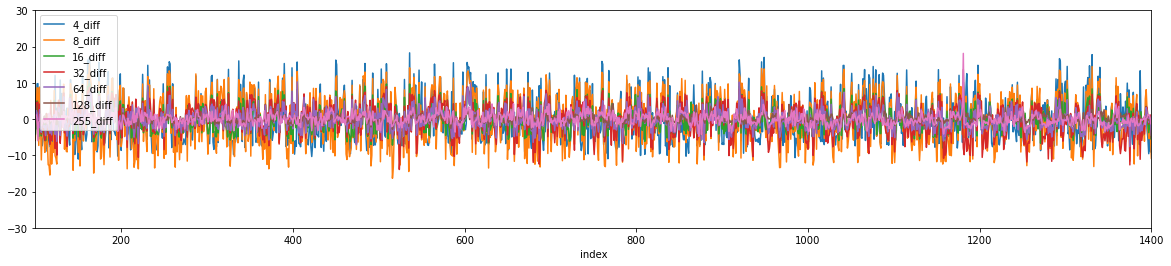

In [222]:
blue_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'])

<AxesSubplot:xlabel='index'>

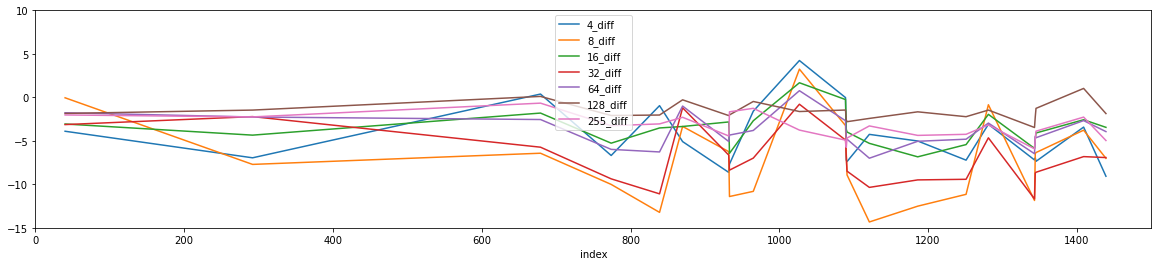

In [257]:
blue_new_overlap_df.reset_index().iloc[idx_set_blue].plot(figsize=[20, 4],xlim=[0, 1500], ylim = [-15, 10],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'], kind='line')

<AxesSubplot:xlabel='index'>

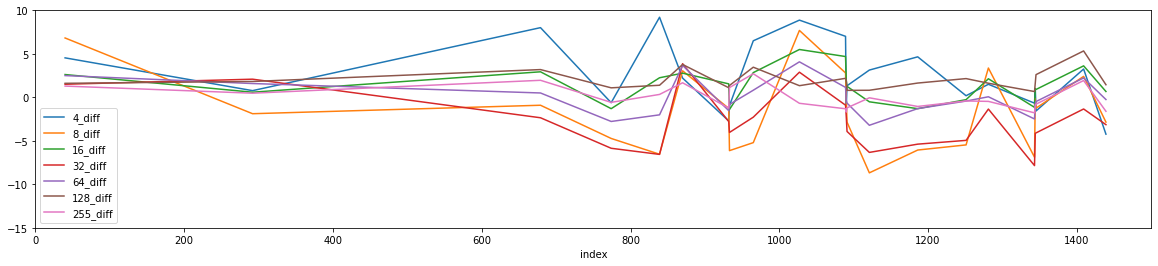

In [258]:
blue_new_df.reset_index().iloc[idx_set_blue].plot(figsize=[20, 4],xlim=[0, 1500], ylim = [-15, 10],x='index', y=['4_diff', '8_diff', '16_diff', '32_diff', '64_diff', '128_diff', '255_diff'], kind='line')

<AxesSubplot:xlabel='index'>

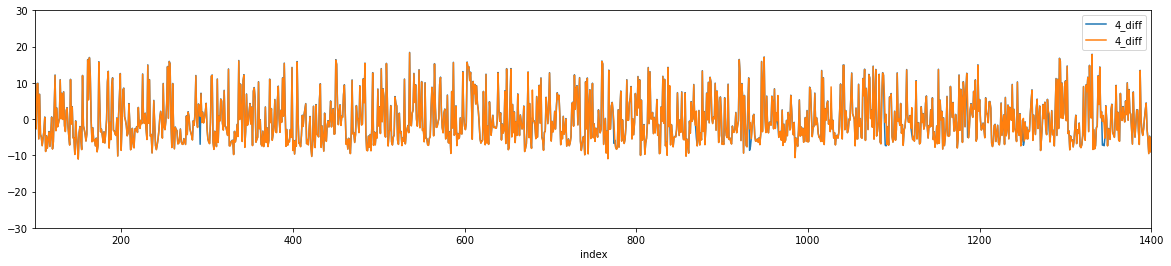

In [224]:
ax = blue_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff'])
blue_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff'], kind = 'line', ax=ax)

<AxesSubplot:xlabel='index'>

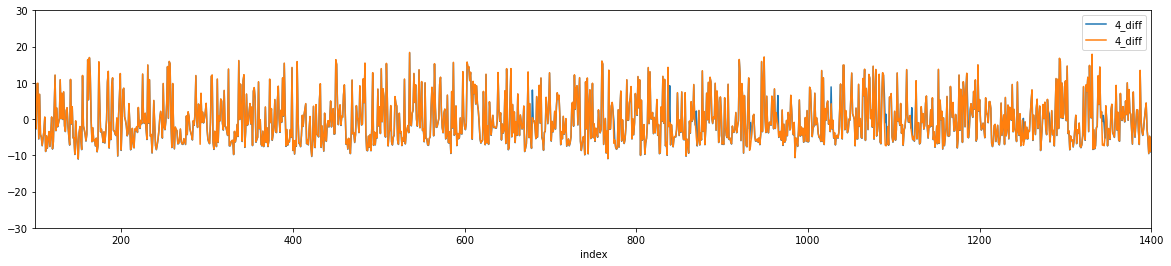

In [226]:
ax = blue_new_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff'], kind = 'line')
blue_new_overlap_df.reset_index().plot(figsize=[20, 4],xlim=[100, 1400], ylim = [-30, 30],x='index', y=['4_diff'], ax=ax)

# green_blue_overlap testing

In [110]:
green_blue_overlap[green_blue_overlap > 0]

array([1, 1, 1, 1, 1])

In [111]:
overlap_green = green_image_255 * green_blue_overlap 
overlap_blue_2 = blue_image_255 * green_blue_overlap 


In [112]:
overlap_green[overlap_green > 0]

array([9, 9, 9, 9, 9])

In [113]:
overlap_blue_2[overlap_blue_2 > 0]

array([154, 145, 162,  10, 151])

In [114]:
green_g_b_percentage = 100 * overlap_green.astype(np.float32) / (overlap_blue_2.astype(np.float32) + overlap_green.astype(np.float32))

/var/folders/zj/cjnnn8695qx8mqcc36hww0y80000gp/T/ipykernel_93553/1198205009.py:1: RuntimeWarning: invalid value encountered in true_divide
  green_g_b_percentage = 100 * overlap_green.astype(np.float32) / (overlap_blue_2.astype(np.float32) + overlap_green.astype(np.float32))


In [115]:
green_g_b_percentage[green_g_b_percentage > 0]

array([ 5.5214725,  5.844156 ,  5.263158 , 47.36842  ,  5.625    ],
      dtype=float32)

In [270]:
overlap_green[overlap_green > 0]

array([247, 247, 247, 247, 247], dtype=uint8)

In [257]:
len(green_blue_overlap[green_blue_overlap > 0])

5

In [258]:
len(red_green_overlap[red_green_overlap > 0])

0

In [228]:
green_binary_tmp.max()

255

In [259]:
len(red_blue_overlap[red_blue_overlap > 0])

22

In [ ]:
# red / (red + blue)

In [ ]:
# red * (overlapped (red)) / total (red + blue)


In [303]:
red_covered_pixels_mapping

{0: [[0, 4], [1, 4], [1, 5], [0, 5], [0, 6], [1, 6]],
 1: [[0, 11], [1, 11], [1, 12], [0, 12], [0, 13], [1, 13]],
 2: [[0, 17], [1, 17], [1, 18], [0, 18], [0, 19], [1, 19]],
 3: [[0, 24], [1, 24], [1, 25], [0, 25], [0, 26], [1, 26]],
 4: [[0, 31], [1, 31], [1, 32], [0, 32], [0, 33], [1, 33]],
 5: [[0, 38], [1, 38], [1, 39], [0, 39], [0, 40]],
 6: [[0, 44], [0, 45], [1, 45], [1, 46], [0, 46], [0, 47]],
 7: [[0, 51], [0, 52], [1, 52], [1, 53], [0, 53]],
 8: [[0, 58], [0, 59], [1, 59], [0, 60]],
 9: [[0, 65], [0, 66], [1, 66], [0, 67]],
 10: [[0, 71], [0, 72], [0, 73], [0, 74]],
 11: [[0, 78], [0, 79], [0, 80]],
 12: [[0, 85], [0, 86], [0, 87]],
 13: [[0, 92], [0, 93], [0, 94]],
 14: [[0, 99], [0, 100], [0, 101]],
 15: [[0, 105], [0, 106], [0, 107]],
 16: [[0, 112], [0, 113], [0, 114]],
 17: [[0, 119], [0, 120], [0, 121]],
 18: [[0, 126], [0, 127], [0, 128]],
 19: [[0, 132], [0, 133], [0, 134], [0, 135]],
 20: [[0, 139], [0, 140], [0, 141]],
 21: [[0, 146], [0, 147], [0, 148]],
 22: [[0, 

In [224]:
green_blue_overlap.sum() / green_binary.sum() 

0.0004257130693912303

In [225]:
green_blue_overlap.sum() / blue_binary.sum() 

0.0005332764505119454

In [191]:
combine = red_binary.copy()

In [232]:
combine[green_binary_tmp == 255] = 200

In [235]:
combine[blue_binary == 255] = 50

In [236]:
cv2.imwrite('/Users/codyyu/Desktop/leakage_data_WHITE_TEST/new_data/down_sampled/output/test.png',combine)

True

In [305]:
red_binary

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [304]:
red_signal_map_4

{0: 335,
 1: 292,
 2: 255,
 3: 358,
 4: 297,
 5: 261,
 6: 353,
 7: 266,
 8: 233,
 9: 311,
 10: 225,
 11: 208,
 12: 260,
 13: 352,
 14: 225,
 15: 256,
 16: 185,
 17: 237,
 18: 301,
 19: 238,
 20: 335,
 21: 184,
 22: 146,
 23: 149,
 24: 90,
 25: 90,
 26: 102,
 27: 104,
 28: 111,
 29: 282,
 30: 314,
 31: 438,
 32: 270,
 33: 275,
 34: 257,
 35: 327,
 36: 340,
 37: 366,
 38: 264,
 39: 346,
 40: 372,
 41: 350,
 42: 267,
 43: 437,
 44: 471,
 45: 401,
 46: 299,
 47: 266,
 48: 186,
 49: 362,
 50: 492,
 51: 314,
 52: 387,
 53: 285,
 54: 228,
 55: 461,
 56: 389,
 57: 250,
 58: 298,
 59: 265,
 60: 182,
 61: 485,
 62: 519,
 63: 304,
 64: 278,
 65: 285,
 66: 357,
 67: 399,
 68: 424,
 69: 243,
 70: 300,
 71: 254,
 72: 362,
 73: 561,
 74: 247,
 75: 272,
 76: 347,
 77: 484,
 78: 361,
 79: 196,
 80: 243,
 81: 275,
 82: 205,
 83: 363,
 84: 406,
 85: 205,
 86: 365,
 87: 284,
 88: 221,
 89: 419,
 90: 219,
 91: 301,
 92: 259,
 93: 251,
 94: 307,
 95: 328,
 96: 536,
 97: 366,
 98: 388,
 99: 350,
 100: 321,
 

In [306]:
red_binary

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ..., 255,   0,   0],
       ...,
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [314]:
Red_r_b_percentage = Red_r_b_percentage.astype(np.uint8)
Red_r_b_percentage[np.isnan(Red_r_b_percentage)] = 0

Blue_r_b_percentage = 100 - Red_r_b_percentage

In [ ]:
red_binary_2 = red_binary + ()

In [ ]:
red_signal_map_4 = get_signal_mapping(clear_image_4, red_covered_pixels_mapping)
red_signal_map_8 = get_signal_mapping(clear_image_8, red_covered_pixels_mapping)
red_signal_map_16 = get_signal_mapping(clear_image_16, red_covered_pixels_mapping)
red_signal_map_32 = get_signal_mapping(clear_image_32, red_covered_pixels_mapping)
red_signal_map_64 = get_signal_mapping(clear_image_64, red_covered_pixels_mapping)
red_signal_map_128 = get_signal_mapping(clear_image_128, red_covered_pixels_mapping)
red_signal_map_255 = get_signal_mapping(clear_image_255, red_covered_pixels_mapping)